# АНАЛИЗ ДАННЫХ О ПРОДАЖАХ ИНТЕРНЕТ-МАГАЗИНА ПО ПРОДАЖЕ ИГР "СТРИМЧИК" ДО 2016 ГОДА.

Мы проводим анализ данных продаж компьютерных игр интернет-магазином "Стримчик" до 2016 года. В нашем распоряжение датафрейм, содержащий следующие данные:
- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В рамках проведения исследования перед нами стоят следующие задачи:

1. Загрузка и первичный анализ данных;
2. Предобработка данных;
3. Исследование данных:
   - анализ количества выпущенных игр в разные годы;
   - анализ сведений а платформах;
   - анализ данных за **актуальный** период.
4. Составление портрета пользователя из каждого региона;
5. Проверка гипотез:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.
6. Подведение итогов и общий вывод.

***ВАЖНО:***

Год выпуска игры не означает, что количество проданных копий этой игры, указанных в графах с продажами в различных регионах, было достигнуто в тот же год. То есть, если для какой-либо игры `year_of_release` указан 2000, а количество проданных копий в Европе - 100 000, это не значит, что все 100 000 копий были проданы в 2000 году. Однако учитывая специфику современной игровой индустрии, в которой новые игры появляются практически каждый день, и тот факт, что основная работа планируется с актуальными данными за последние несколько лет, мы можем считать, что основной объем приобретений игры происходит в год ее выпуска, а затем она "забывается".

## Используемые библиотеки.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st


<a id="step_1"></a>
# Загрузка и первичный анализ данных.

In [2]:
try:
    data = pd.read_csv ('')
except:
    data = pd.read_csv('games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.shape

(16715, 11)

In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


По итогам предварительной оценки данных, находящихся в датафрейме, мы получили следующие результаты:
В датафрейме **16715** строк и **11 столбцов**. 

Названия столбцов необходимо привести в соответствие со стандартами записи переменных, изменив регистр всех букв на нижний.

Информация по столбцам датафрейма:

- `Name` — хранит 16713 непустых значений с типом данных `object`. Предварительно можно сказать, что в данном столбце присутствуют два пропуска. Тип данных признаем подходящим для хранимой информации.
- `Platform` —  хранит 16715 непустых значений с типом данных `object`. Пропуски отсутствуют. Тип данных признаем подходящим для хранимой информации.
- `Year_of_Release` — хранит 16446 непустых значений с типом данных `float64`. Предварительно можно сказать, что в данном столбце присутствуют 269 пропусков. Тип данных необходимо изменить на `int`, так как год выпуска не может иметь значения после запятой.
- `Genre` — хранит 16713 непустых значений с типом данных `object`. Предварительно можно сказать, что в данном столбце присутствуют два пропуска. Тип данных признаем подходящим для хранимой информации.
- `NA_sales` — хранит 16715 непустых значений с типом данных `float64`. Пропуски отсутствуют. Тип данных необходимо изменить на `int`.
- `EU_sales` — хранит 16715 непустых значений с типом данных `float64`. Пропуски отсутствуют. Тип данных необходимо изменить на `int`.
- `JP_sales` — хранит 16715 непустых значений с типом данных `float64`. Пропуски отсутствуют. Тип данных необходимо изменить на `int`.
- `Other_sales` — хранит 16715 непустых значений с типом данных `float64`. Пропуски отсутствуют. Тип данных необходимо изменить на `int`.
- `Critic_Score` — хранит 8137 непустых значений с типом данных `float64`. Предварительно можно сказать, что в данном столбце присутствуют 8578 пропусков. Тип данных признаем подходящим.
- `User_Score` — хранит 10014 непустых значений с типом данных `object`. Предварительно можно сказать, что в данном столбце присутствуют 6701 пропуск. Тип данных необходимо изменить на `float`.
- `Rating` — хранит 9949 непустых значений с типом данных `object`. Предварительно можно сказать, что в данном столбце присутствуют 6766 пропусков. Тип данных признаем подходящим для хранимой информации.


In [6]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

- `EC` - Для детей младшего возраста.
- `E` - Подходит для всех возрастных категорий. 
- `E10+` - Подходит для лиц старше 10 лет. То же самое, что и K-A.
- `T` - Подходит для лиц старше 13 лет. 
- `M` - Подходит для лиц старше 17 лет. 
- `AO` - Подходит для взрослых старше 18 лет.
- `RP` - Категория ещё не присвоена. 


[К общим итогам](#results) 

<a id="step_2"></a>
# Предобработка данных.

## Переименование столбцов.

Сперва приведем в соответствие названия столбцов датафрейма.

In [7]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
data.columns = ['name',
                'platform',
                'year_of_release',
                'genre','na_sales',
                'eu_sales',
                'jp_sales',
                'other_sales',
                'critic_score',
                'user_score',
                'rating']

In [9]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Переименование колонок прошло успешно.

## Преобразование типов данных

На этапе первичной оценки данных, мы определили столбцы, в которых необходимо изменить тип данных:
- `year_of_release` - данные представлены в формате `float64`. Год выпуска игры всегда является целым числом, в связи с этим целесообразно изменить тип данных на `int`.
- `na_sales` - данные представлены в формате `float64`. Однако в данном столбце хранится информация о количестве проданных экземпляров игр в Северной Америке. Эта величина всегда будет целым числом, поэтому целесообразно изменить тип данных на `int`, чтобы избежать тех ограничений, которые имеют данные типа `float`. Однако в настоящий момент в данном столбце представлены данные с единицей измерения *(миллионов штук)*, поэтому их необходимо сначала перевести в штуки, а затем уже изменять тип данных.
- `eu_sales`- данные представлены в формате `float64`. Однако в данном столбце хранится информация о количестве проданных экземпляров игр в европейском регионе. Эта величина всегда будет целым числом, поэтому целесообразно изменить тип данных на `int`, чтобы избежать тех ограничений, которые имеют данные типа `float`. Однако в настоящий момент в данном столбце представлены данные с единицей измерения *(миллионов штук)*, поэтому их необходимо сначала перевести в штуки, а затем уже изменять тип данных. 
- `jp_sales` - данные представлены в формате `float64`. Однако в данном столбце хранится информация о количестве проданных экземпляров игр в Японии. Эта величина всегда будет целым числом, поэтому целесообразно изменить тип данных на `int`, чтобы избежать тех ограничений, которые имеют данные типа `float`. Однако в настоящий момент в данном столбце представлены данные с единицей измерения *(миллионов штук)*, поэтому их необходимо сначала перевести в штуки, а затем уже изменять тип данных.
- `other_sales` - данные представлены в формате `float64`. Однако в данном столбце хранится информация о количестве проданных экземпляров игр в других странах. Эта величина всегда будет целым числом, поэтому целесообразно изменить тип данных на `int`, чтобы избежать тех ограничений, которые имеют данные типа `float`. Однако в настоящий момент в данном столбце представлены данные с единицей измерения *(миллионов штук)*, поэтому их необходимо сначала перевести в штуки, а затем уже изменять тип данных.
- `user_score` - невозможно работать с оценками, если они представлены в строковом формате, тип данных нужно изменить на `float`.


### year_of_release

Изменим тип данных столбца на `int`. Но сначала нам необходимо разобраться с пропускми в данном столбце.

По имеющимся данным невозможно предположить, в каком году вышли игры, у которых значение `year_of_release` осталось пустым. Например, если игра "крестики-нолики" вышла на компьютерах в 1998 году, это не дает нам возможности с уверенностью утверждать, в каком году игра вышла на Xbox.

Информация о годе выпуска игры может отсутствовать в случае, если игра была выпущена в те времена, когда интернет и компьютерные технологии не были настолько развиты, и информация такого рода могла просто не сохраниться до наших дней. Либо если игра не слишком известная и была выпущена для какой-либо специфичной платформы.

Возможно, целесообразно будет удалить строки с пропусками в столбце `year_of_release`.

In [10]:
(data['year_of_release'].isna().sum()/len(data))*100

1.609332934489979

В случае удаления строк с пропуском в столбце `year_of_release` мы потеряем чуть более полутора процентов от изначального датафрейма, что является приемлимым уровнем потерь.

In [11]:
data = data[data['year_of_release'].isna() == False]

Теперь мы без проблем сможем изменить тип данных на `int`.

In [12]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [14]:
data.shape

(16446, 11)

Тип данных успешно изменен.

### na_sales, eu_sales, jp_sales, other_sales

Изменим тип данных столбца на `int`, предварительно домножив значения на 1 000 000, так как данные представлены в миллионах.

In [15]:
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = (data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]*1000000).astype('int')

In [16]:
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

,na_sales,eu_sales,jp_sales,other_sales
0,41360000,28960000,3770000,8450000
1,29080000,3580000,6810000,770000
2,15680000,12760000,3790000,3290000
3,15610000,10930000,3280000,2950000
4,11270000,8890000,10220000,1000000
...,...,...,...,...
16710,0,0,10000,0
16711,0,10000,0,0
16712,0,0,10000,0
16713,10000,0,0,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  int64  
 5   eu_sales         16446 non-null  int64  
 6   jp_sales         16446 non-null  int64  
 7   other_sales      16446 non-null  int64  
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 1.5+ MB


Тип данных успешно изменен.

### user_score

In [18]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Отдельно обратим внимание на значение `tbd` в столбце с оценкой пользователей.

In [19]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3450000,2590000,0,660000,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2080000,1350000,0,540000,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1510000,1030000,0,270000,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1650000,570000,0,200000,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1520000,540000,0,180000,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,10000,0,0,0,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,10000,0,0,0,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,10000,0,0,0,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,10000,0,0,0,NaN,tbd,E


Даже при выводе на экран 10 строк становится понятно, что данное значение не связано ни с одним из параметров. Проверим только jp_sales. Так как в выведенных на экран строках в этом столбце везде 0.

In [20]:
data[(data['user_score'] == 'tbd') & (data['jp_sales'] != 0)]['jp_sales'].count()

82

Как мы видим, данное значение столбца `user_score` относится к играм, продающихся во всех регионах.

TBD - означает "to be determind", то есть "будет определено". Это означает, что для данной игры слишком мало оценок пользователей, чтобы публиковать итоговое значение.
Однако для изменения типа данных в столбце значение `tbd` неприемлемо. Так как оно означает отсутствие оценки, то для нас NaN и `tbd` одинаковы. Заменим их одним общим значением, которое невозможно встретить в существующих оценках, например отрицательным числом. В дальнейшем мы посмотрим, что можно сделать с отсутствием оценки.

In [21]:
data['user_score'] = data['user_score'].replace('tbd', -1).fillna(-1).astype('float')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  int64  
 5   eu_sales         16446 non-null  int64  
 6   jp_sales         16446 non-null  int64  
 7   other_sales      16446 non-null  int64  
 8   critic_score     7983 non-null   float64
 9   user_score       16446 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 1.5+ MB


Тип данных успешно изменен.

## Обработка пропсуков.

Пропуски присутствуют в следующих столбцах:

- name
- genre
- critic_score
- user_score
- rating

### name и genre

В данных столбцах всего по два пропуска. Можно предположить, что это одни и те же строки.

In [23]:
data.query('(name.isna() == True) and (genre.isna() == True)')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1780000,530000,0,80000,NaN,-1.0,NaN
14244,NaN,GEN,1993,NaN,0,0,30000,0,NaN,-1.0,NaN


Об игре нет практически никакой информации: отсутствуют данные о название игры, жанре, оценках критиков, оценка пользователей и возрастном рейтинге. Учитывая количество строк, то будет проще их удалить.

In [24]:
data = data[(data['name'].isna() != True) & (data['genre'].isna() != True)]

In [25]:
data.reset_index(inplace=True, drop=True)

In [26]:
data.shape

(16444, 11)

In [27]:
data[['name', 'genre']].isna().sum()

name     0
genre    0
dtype: int64

Пропуски для столбцов `name` и `genre` обработаны.

### rating

Сначала изучим основную информацию о данном столбце.

In [28]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29080000,3580000,6810000,770000,NaN,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270000,8890000,10220000,1000000,NaN,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23200000,2260000,4220000,580000,NaN,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26930000,630000,280000,470000,NaN,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9050000,10950000,1930000,2740000,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10000,0,NaN,-1.0,NaN
16440,LMA Manager 2007,X360,2006,Sports,0,10000,0,0,NaN,-1.0,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,10000,0,NaN,-1.0,NaN
16442,Spirits & Spells,GBA,2003,Platform,10000,0,0,0,NaN,-1.0,NaN


Похоже, есть много игр, для которых нет информации об оценках и о рейтинге. Проверим это.

In [29]:
len(data[(data['critic_score'].isna()) & (data['user_score'] < 0)  & (data['rating'].isna())])

6580

In [30]:
data[(data['critic_score'].isna()) & (data['user_score'] < 0)  & (data['rating'].isna())]['year_of_release'].value_counts()

2010    453
2008    440
2011    419
2009    408
2007    375
1998    346
2006    327
1999    296
2012    290
2015    273
1997    268
1996    255
2005    232
2014    231
2013    222
1995    219
2016    206
2000    200
2002    174
2003    161
2004    161
2001    143
1994    120
1993     60
1981     46
1991     41
1992     41
1982     36
1986     21
1983     17
1989     17
1990     16
1987     16
1984     14
1988     14
1985     13
1980      9
Name: year_of_release, dtype: int64

Как мы видим, отсутствие сведений о рейтинге и оценках пользователей/критиков не связано с тем, что игра могла быть слишком старой, так как много мгр без этих сведений с послендими годами выпуска.

Так что необходимо обратить внимание на процесс сбора указанных сведений. Возможно, их можно улучшить.

Мы нашли 6580 строк, у которых отсутствует информация об оценке пользователей, критиков и  о возрастном рейтинге. Это может быть связано с тем, что данная информация берется с какого-то стороннего ресурса, и на данном ресурсе нет информации об этих играх.

Можно предположить, что если одна игра в списке представлена для различных платформ, то она все равно должна иметь одинаковый рейтинг, так как это одна и та же игра. В таком случае для игр, представленных в нескольких вариациях, пропуски в столбце `rating` можно заполнить значением рейтинга для этой же игры, но с другой платформы или другого года выпуска.

Возьмем для этого игру, у которой больше всего "клонов".

In [31]:
data['name'].value_counts()

Need for Speed: Most Wanted                   12
Ratatouille                                    9
FIFA 14                                        9
LEGO Marvel Super Heroes                       9
LEGO The Hobbit                                8
                                              ..
Dragon Tamer: Sound Spirit                     1
Hanayori Danshi: Koi Seyo Onago                1
Fire Pro Wrestling Returns                     1
Jikkyou Powerful Pro Yakyuu '96 Kaimakuban     1
Famicom Mini: Star Soldier                     1
Name: name, Length: 11426, dtype: int64

In [32]:
data[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
252,Need for Speed: Most Wanted,PS2,2005,Racing,2029999,1790000,80000,470000,82.0,9.1,T
519,Need for Speed: Most Wanted,PS3,2012,Racing,710000,1460000,60000,580000,NaN,-1.0,NaN
1177,Need for Speed: Most Wanted,X360,2012,Racing,620000,780000,10000,150000,83.0,8.5,T
1574,Need for Speed: Most Wanted,X360,2005,Racing,1000000,130000,20000,100000,83.0,8.5,T
1976,Need for Speed: Most Wanted,XB,2005,Racing,530000,460000,0,50000,83.0,8.8,T
2025,Need for Speed: Most Wanted,PSV,2012,Racing,330000,450000,10000,220000,NaN,-1.0,NaN
3531,Need for Speed: Most Wanted,GC,2005,Racing,430000,110000,0,20000,80.0,9.1,T
5883,Need for Speed: Most Wanted,PC,2005,Racing,20000,230000,0,40000,82.0,8.5,T
6177,Need for Speed: Most Wanted,WiiU,2013,Racing,130000,120000,0,20000,NaN,-1.0,NaN
6310,Need for Speed: Most Wanted,DS,2005,Racing,240000,10000,0,20000,45.0,6.1,E


На примере игры Need for Speed: Most Wanted мы видим, что у одной и той же игры может быть разный рейтинг. В связи с этим мы не можем заполнить пропуски в рейтинге аналогичным рейтингом для этой игры.

Также у нас есть значение `RP`, которое также означает отсутствие рейтинга.
Посмотрим, сколько строк с таким значением.

In [33]:
data[data['rating'] == 'RP']['rating'].count()

1

Всего одна строка имеет значение `RP`.

In [34]:
data[data['rating'] == 'RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14045,Supreme Ruler: Cold War,PC,2011,Strategy,0,30000,0,10000,63.0,6.8,RP


Это игра, имеющая незначительное количество продаж, так что мы можем спокойно удалить эту строку.

In [35]:
data.shape

(16444, 11)

In [36]:
data = data[data['rating'] != 'RP']

In [37]:
data.shape

(16443, 11)

In [38]:
data.reset_index(inplace=True, drop=True)

Чтобы не потерять пропуски при дальнейшем анализе, заполним их значением `unknown`.

In [39]:
data['rating'] = data['rating'].fillna('unknown')

In [40]:
data['rating'].isna().sum()

0

In [41]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

### critic_score и user_score

Теоритечески мы могли бы заполнить пропуски в этих столбцах для игр на основе имеющейся информации об этих же играх, но выпущенных на других платформах. Однако это будет неверно, так как пользовательский опыт на разных платформах может различаться. Игры, имеющая высокие оценки на ПК, может с треском провалиться на консолях.

## Обработка дубликатов.

### Явные дубликаты.

In [42]:
data.duplicated().sum()

0

### Дубликаты по ключевым значениям.

Будем считать, что если для строк название игры, год выпуска игры и платформа одинаковы, а остальные значения различаются, то это неявные дубликаты.

In [43]:
data.duplicated(['name','platform','year_of_release']).sum()

1

In [44]:
data[data.duplicated(['name','platform','year_of_release']) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15968,Madden NFL 13,PS3,2012,Sports,0,10000,0,0,83.0,5.5,E


In [45]:
data[data['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
503,Madden NFL 13,X360,2012,Sports,2530000,150000,0,170000,81.0,5.8,E
600,Madden NFL 13,PS3,2012,Sports,2110000,220000,0,230000,83.0,5.5,E
3933,Madden NFL 13,Wii,2012,Sports,470000,0,0,30000,NaN,7.3,E
5800,Madden NFL 13,PSV,2012,Sports,280000,0,0,20000,63.0,7.3,E
6956,Madden NFL 13,WiiU,2012,Sports,210000,0,0,20000,75.0,6.7,E
15968,Madden NFL 13,PS3,2012,Sports,0,10000,0,0,83.0,5.5,E


Чтобы не потерять информацию о количество проданных копий, прибавим в "основную" строку соответствующее значение.

In [46]:
data.loc[600,'eu_sales'] = data.loc[600,'eu_sales']+10000

In [47]:
data = data.drop_duplicates(['name','platform','year_of_release'], keep='first')

In [48]:
data.reset_index(inplace=True, drop=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  int64  
 5   eu_sales         16442 non-null  int64  
 6   jp_sales         16442 non-null  int64  
 7   other_sales      16442 non-null  int64  
 8   critic_score     7981 non-null   float64
 9   user_score       16442 non-null  float64
 10  rating           16442 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 1.4+ MB


Также на этапе первичной оценки данных мы установили, что рейтинг `E10+` и `K-A` это разные названия для одного и того же рейтинга, так что необходимо оставить только один, а второй заменить на значение первого. Оставим `E10+`.

In [50]:
data['rating'] = data['rating'].replace('K-A', 'E10+')

In [51]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

неявные дубликаты успешно обработаны.

[К общим итогам](#results) 

# Расчет суммарных продаж.

Создадим дополнительный столбец, в котором для каждой строки будут подсчитаны суммарные продажи во всех регионах. Для этого создадим функцию.

In [52]:
def sells_count(data):
    sells= []
    for i in range(len(data)):
        count = data.loc[i,'na_sales']+data.loc[i,'eu_sales']+data.loc[i,'jp_sales']+data.loc[i,'other_sales']
        sells.append(count)
    return sells

In [53]:
data['total_sell'] = sells_count(data)

In [54]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sell
0,Wii Sports,Wii,2006,Sports,41360000,28960000,3770000,8450000,76.0,8.0,E,82540000
1,Super Mario Bros.,NES,1985,Platform,29080000,3580000,6810000,770000,NaN,-1.0,unknown,40240000
2,Mario Kart Wii,Wii,2008,Racing,15680000,12760000,3790000,3290000,82.0,8.3,E,35520000
3,Wii Sports Resort,Wii,2009,Sports,15610000,10930000,3280000,2950000,80.0,8.0,E,32770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270000,8890000,10220000,1000000,NaN,-1.0,unknown,31380000
...,...,...,...,...,...,...,...,...,...,...,...,...
16437,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10000,0,NaN,-1.0,unknown,10000
16438,LMA Manager 2007,X360,2006,Sports,0,10000,0,0,NaN,-1.0,unknown,10000
16439,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,10000,0,NaN,-1.0,unknown,10000
16440,Spirits & Spells,GBA,2003,Platform,10000,0,0,0,NaN,-1.0,unknown,10000


In [55]:
data['total_sell'].isna().sum()

0

Добавление данных произведено успешно.

[К общим итогам](#results) 

<a id="step_3"></a>
# Исследовательский анализ данных.

Нас интересует несколько вопросов:
1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. За какой характерный срок появляются новые и исчезают старые платформы?
3. Какие платформы лидируют по продажам, растут или падают?
4. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

## Выпуск игр по годам.

In [56]:
data.pivot_table(index='year_of_release', aggfunc={'year_of_release':'count'})

,year_of_release
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


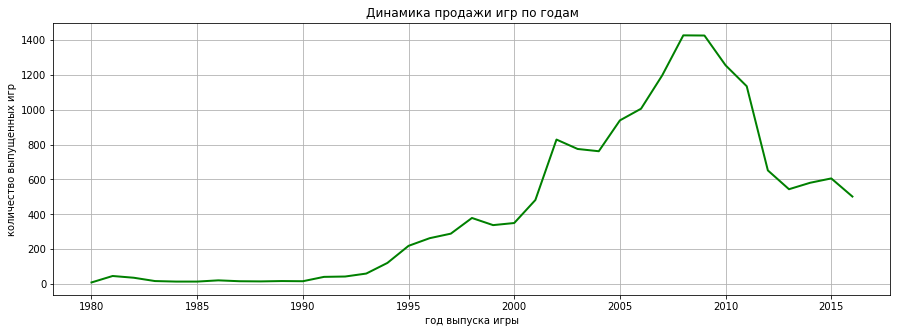

In [57]:
data.pivot_table(index='year_of_release', aggfunc={'year_of_release':'count'}).plot.line(
grid=True,
color='g',
linewidth=2,
xlabel='год выпуска игры',
ylabel='количество выпущенных игр',
title='Динамика продажи игр по годам',
figsize=(15,5)).legend().set_visible(False)

Игр, выпущенных до 1993 года, крайне мало.

In [58]:
len(data.query('year_of_release <= 1993'))

365

График и таблица распределения показывают, что количество, выпущенных до 1993 игр, крайне мало и по сути является выбросом. Однако перед нами сейчас не стоит задача их отсечь, а в дальнейшем нами будет определен актуальный период, с которым будет проводиться вся основная работа.

## Динамика продаж по платформам.

In [59]:
data.groupby('platform')['total_sell'].sum().sort_values(ascending=False)

platform
PS2     1233559992
X360     961239999
PS3      931339995
Wii      891179997
DS       802780000
PS       727579994
PS4      314139997
GBA      312879999
PSP      289530000
3DS      257809997
PC       255719998
GB       254429999
XB       251569999
NES      251049998
N64      218009998
SNES     200040000
GC       196730000
XOne     159319999
2600      86480000
WiiU      82190000
PSV       53810000
SAT       33590000
GEN       28350000
DC        15950000
SCD        1860000
NG         1440000
WS         1420000
TG16        160000
3DO         100000
GG           40000
PCFX         30000
Name: total_sell, dtype: int64

Первые 6 наиболее популярных платформ имеют значительный отрыв от остальных, рассмотрим их отдельно.

In [60]:
top_six = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [61]:
pd.pivot_table(
    data.query('platform == @top_six'), 
    index='year_of_release', 
    columns='platform',
    values='total_sell',
    aggfunc='sum').round()

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,20000.0,NaN,NaN,NaN,NaN,NaN
1994,NaN,6030000.0,NaN,NaN,NaN,NaN
1995,NaN,35960000.0,NaN,NaN,NaN,NaN
1996,NaN,94699999.0,NaN,NaN,NaN,NaN
1997,NaN,136169999.0,NaN,NaN,NaN,NaN
1998,NaN,169489999.0,NaN,NaN,NaN,NaN
1999,NaN,144529999.0,NaN,NaN,NaN,NaN
2000,NaN,96369998.0,39170000.0,NaN,NaN,NaN
2001,NaN,35590000.0,166429996.0,NaN,NaN,NaN


DS - это приставка Nintendo DS, выпущенная в 2004 году. Очень странно, что для данной платформы присутствуют продажи в 1985 году. Посмотрим на них отдельно.

In [62]:
data.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sell
15703,Strongest Tokyo University Shogi DS,DS,1985,Action,0,0,20000,0,NaN,-1.0,unknown,20000


По информации из открытых источников игра "Strongest Tokyo University Shogi DS" вышла в 2007 году. Непонятно, откуда появилась ошибка в датафрейме, но она влияет на исследование и ее необходимо устранить. Заменим год на 2007.

In [63]:
data[data['name'] == 'Strongest Tokyo University Shogi DS'] =\
data[data['name'] == 'Strongest Tokyo University Shogi DS'].replace(1985,2007)

In [64]:
data[data['name'] == 'Strongest Tokyo University Shogi DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sell
15703,Strongest Tokyo University Shogi DS,DS,2007,Action,0,0,20000,0,NaN,-1.0,unknown,20000


Готово, теперь можно строить графики.

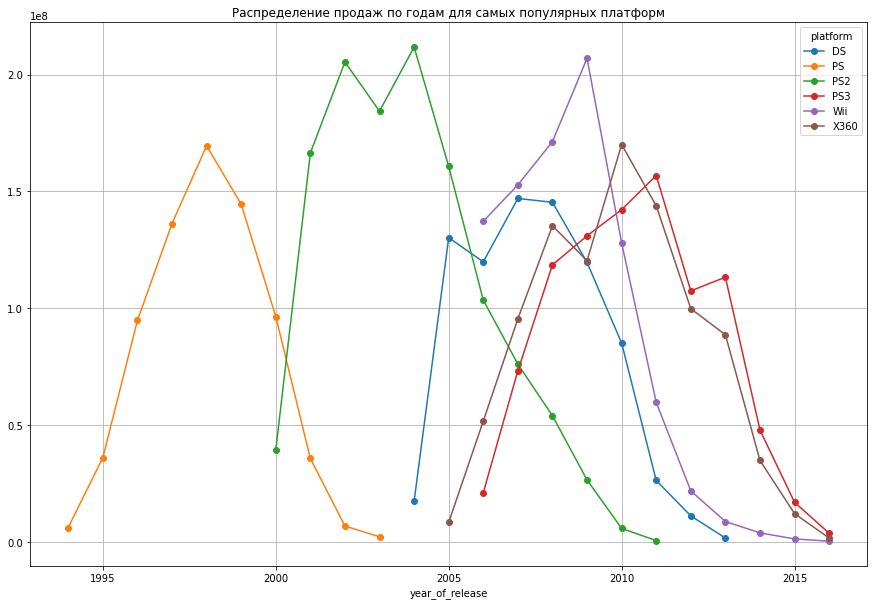

In [65]:
pd.pivot_table(
    data.query('platform == @top_six'), 
    index='year_of_release', 
    columns='platform',
    values='total_sell',
    aggfunc='sum').round().plot.line(figsize=(15,10), 
                                     grid=True, 
                                     style='o-', 
                                     title='Распределение продаж по годам для самых популярных платформ'
                                    );

In [66]:
for elem in top_six:
    platform_life = max(data[data['platform'] == elem]['year_of_release']) - min(data[data['platform'] == elem]['year_of_release'])
    print(f'Срок жизни платформы {elem} составляет {platform_life+1} лет')
   
    

Срок жизни платформы PS2 составляет 12 лет
Срок жизни платформы X360 составляет 12 лет
Срок жизни платформы PS3 составляет 11 лет
Срок жизни платформы Wii составляет 11 лет
Срок жизни платформы DS составляет 10 лет
Срок жизни платформы PS составляет 10 лет


Срок жизни даже самых популярных платформ составляет 10-12 лет, из которых в среднем первые 4-6 лет - это рост продаж, а затем наступает снижение вплоть до полного прекращения продаж игр. Причем как видно из графиков, к 2016 году наступил закат для большинства основных платформ, а для PS, PS2 и DS это случилось даже раньше.

## Определение актуального периода.

Исходя из того, что мы видими на графике, с 2010 год начался тренд на падение продаж для всех основных платформ. Актуальным периодом можно считать период с 2014 по 2016 год, так как в предыдущие годы есть данные по продажам тех платформ, которые к 2016 году уже "умерли", следовательно изучать информацию о них бессмысленно.
Так как дальше мы будем работать только с этим периодом, то создадим отдельный датафрейм.

In [67]:
data_relevant = data[data['year_of_release'] >= 2014]

## Анализ платформ. Поиск потенциально прибыльных.

In [68]:
data_relevant.pivot_table(index='year_of_release', columns = 'platform', values='total_sell', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43760000.0,13280000.0,47759999.0,99999998.0,240000.0,11900000.0,3750000.0,22030000.0,34740000.0,54070000.0
2015,27780000.0,8520000.0,16820000.0,118899999.0,120000.0,6250000.0,1140000.0,16350000.0,11960000.0,60140000.0
2016,15140000.0,5250000.0,3600000.0,69250000.0,NaN,4250000.0,180000.0,4600000.0,1520000.0,26149999.0


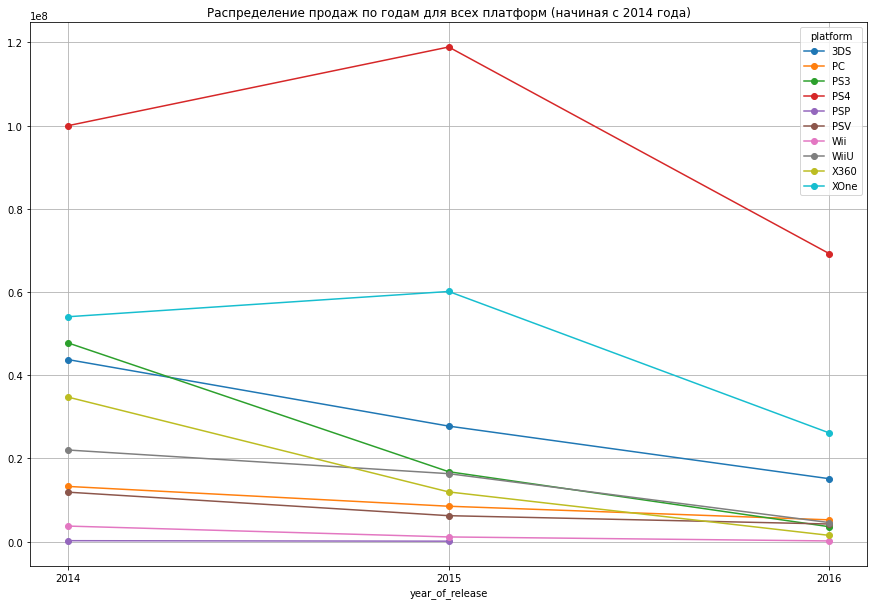

In [69]:
data_relevant.pivot_table( 
               index='year_of_release', 
               columns = 'platform', 
               values='total_sell', 
               aggfunc='sum').plot.line(figsize=(15,10), 
                                     grid=True, 
                                     style='o-', 
                                     title='Распределение продаж по годам для всех платформ (начиная с 2014 года)',
                                     xticks=([2014, 2015, 2016]));

Графики показывают, что ни одна платформа не обещает роста в следующем году. Однако для всех платформ, кроме PS4 и XOne, это тренд, длящийся как минимум с 2014 года, в то время как для PS4 и XOne - это первый год, когда произошло снижение продаж. Также платформа 3DS имеет достойные результаты относительно большинства платформ. Поэтому признаем PS4, XOne и 3DS потенциально прибыльными платформами.

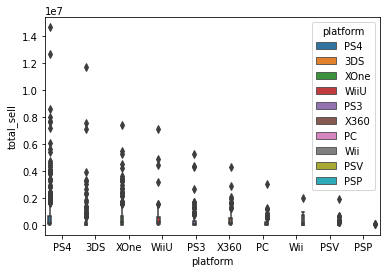

In [70]:
sns.boxplot(data=data_relevant,x='platform',y='total_sell', hue='platform');
sns.set(rc={'figure.figsize':(24,6)})


Выбросы, кратно превышающие нормальные значения, делают график трудночитаемым. Установим диапазон оси Y от 0 до 1 600 000.

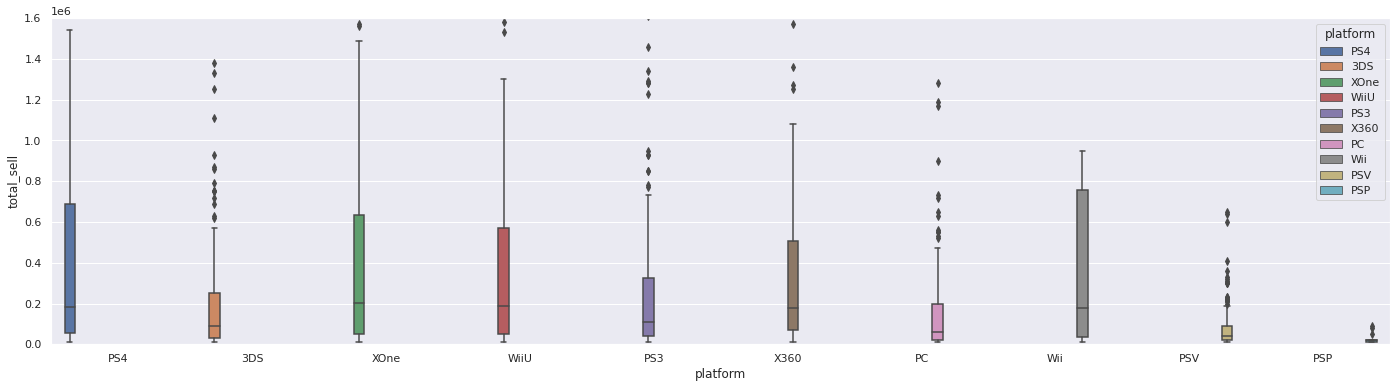

In [71]:
sns.boxplot(data=data_relevant,x='platform',y='total_sell', hue='platform');
sns.set(rc={'figure.figsize':(20,6)})
plt.ylim(0, 1600000);

На графиках мы видим, что медианные значения крупных платформ (PS4, Xone, WiiU, X360, Wii) колеблятся в районе 200 000 проданных игр, а у более маленьких платформ медиана находится в районе 100 000 проданных игр или менее. Ни для одной платформы нормальные значения не превышают полутора миллионов проданных игр. Также видно, что у всех платформ медиана тяготеет к нижней границе ящика, а нижний "ус" упирается в ноль, это говорит о том, что основная масса игр разошлись маленьким тиражом, но есть игры бестселлеры, которые создают выбросы на несколько миллионов проданных копий, и даже на практически 15 000 000 копий.

## Влияние отзывов критиков и пользователей на продажи.

При нахождении корреляции между оценками и количеством продаж необходимо отсеивать выбросы. Исследование будем проводить по самой популярной на 2016 год платформе - PS4. Как показал "ящик с усами", выбросов по нижней границе у данной платформы нет. Рассчитаем верхнюю границу, выше которой объемы продаж будут признаны выбросами.

In [72]:
data_relevant[data_relevant['platform'] == 'PS4']['total_sell'].quantile(0.75) +\
(data_relevant[data_relevant['platform'] == 'PS4']['total_sell'].quantile(0.75) -\
 data_relevant[data_relevant['platform'] == 'PS4']['total_sell'].quantile(0.25)) * 1.5

1638750.0

Будем считать, что значения больше 1 640 000 игр являются выбросами.

In [73]:
data_relevant.query('platform == "PS4" and total_sell <= 1640000')[['total_sell', 'critic_score', 'user_score']].corr()

,total_sell,critic_score,user_score
total_sell,1.000000,0.314305,0.077542
critic_score,0.314305,1.000000,0.518131
user_score,0.077542,0.518131,1.000000


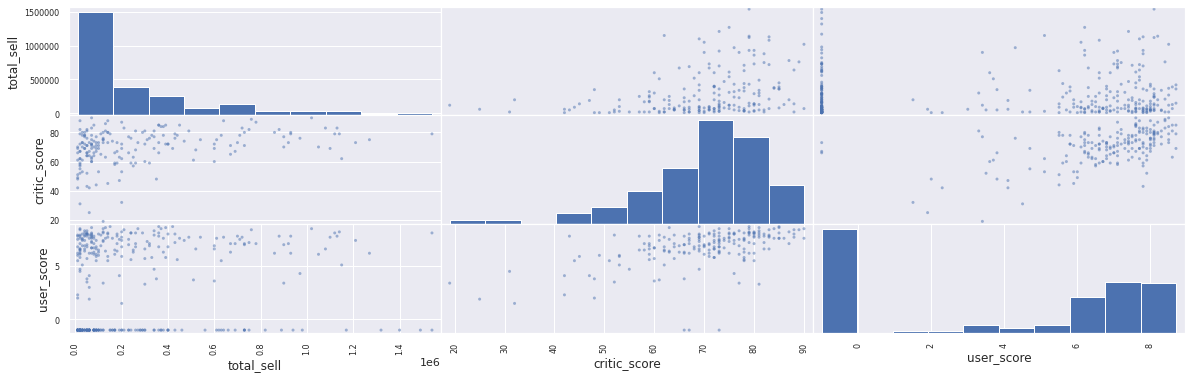

In [74]:
pd.plotting.scatter_matrix(data_relevant.query('platform == "PS4" and total_sell <= 1640000')[['total_sell', 'critic_score', 'user_score']]);

Расчет корреляции и графики говорят о том, что между оценкой игроков и количеством проданных игр корреляция практически отсутствует, а между количеством проданных игр и оценкой критиков есть слабая прямая корреляция. Что в целом близко к реальности, оценка игры от игроков формируется в основном уже после стартового ажиатожа, в ходе которого и покупается основная часть копий игры. То есть стартовый и самый значимый спрос формируют другие факторы, одним из которых (но далеко не решающим) является отзывы критиков.

In [75]:
# функция, рассчитывающую верхнюю границу нормальных значений, а также строящая таблицу корреляций для нормальных значений 
# для выбранной платформы.
def correlation (pl_name):
    r_limit = data_relevant[data_relevant['platform'] == pl_name]['total_sell'].quantile(0.75) +\
    (data_relevant[data_relevant['platform'] == pl_name]['total_sell'].quantile(0.75) -\
    data_relevant[data_relevant['platform'] == pl_name]['total_sell'].quantile(0.25)) * 1.5
    display(data_relevant[(data_relevant['platform'] == pl_name) & (data_relevant['total_sell'] <= r_limit)][['total_sell', 'critic_score', 'user_score']].corr())

In [76]:
for name in data_relevant['platform'].unique():
    print(f'Взаимосвязь между количеством продаж и отзывами критиков и игроков для платформы {name}')
    display(correlation(name))
    

Взаимосвязь между количеством продаж и отзывами критиков и игроков для платформы PS4


,total_sell,critic_score,user_score
total_sell,1.000000,0.314305,0.077542
critic_score,0.314305,1.000000,0.518131
user_score,0.077542,0.518131,1.000000


None

Взаимосвязь между количеством продаж и отзывами критиков и игроков для платформы 3DS


,total_sell,critic_score,user_score
total_sell,1.000000,0.333694,0.351037
critic_score,0.333694,1.000000,0.645893
user_score,0.351037,0.645893,1.000000


None

Взаимосвязь между количеством продаж и отзывами критиков и игроков для платформы XOne


,total_sell,critic_score,user_score
total_sell,1.000000,0.448586,0.241442
critic_score,0.448586,1.000000,0.464999
user_score,0.241442,0.464999,1.000000


None

Взаимосвязь между количеством продаж и отзывами критиков и игроков для платформы WiiU


,total_sell,critic_score,user_score
total_sell,1.000000,0.390531,0.438670
critic_score,0.390531,1.000000,0.457639
user_score,0.438670,0.457639,1.000000


None

Взаимосвязь между количеством продаж и отзывами критиков и игроков для платформы PS3


,total_sell,critic_score,user_score
total_sell,1.000000,0.353765,0.469856
critic_score,0.353765,1.000000,0.657505
user_score,0.469856,0.657505,1.000000


None

Взаимосвязь между количеством продаж и отзывами критиков и игроков для платформы X360


,total_sell,critic_score,user_score
total_sell,1.000000,0.497332,0.158977
critic_score,0.497332,1.000000,0.653900
user_score,0.158977,0.653900,1.000000


None

Взаимосвязь между количеством продаж и отзывами критиков и игроков для платформы PC


,total_sell,critic_score,user_score
total_sell,1.000000,0.318422,0.208057
critic_score,0.318422,1.000000,0.453620
user_score,0.208057,0.453620,1.000000


None

Взаимосвязь между количеством продаж и отзывами критиков и игроков для платформы Wii


,total_sell,critic_score,user_score
total_sell,1.000000,NaN,0.237371
critic_score,NaN,NaN,NaN
user_score,0.237371,NaN,1.000000


None

Взаимосвязь между количеством продаж и отзывами критиков и игроков для платформы PSV


,total_sell,critic_score,user_score
total_sell,1.000000,0.122116,0.423230
critic_score,0.122116,1.000000,0.227627
user_score,0.423230,0.227627,1.000000


None

Взаимосвязь между количеством продаж и отзывами критиков и игроков для платформы PSP


,total_sell,critic_score,user_score
total_sell,1.0,NaN,NaN
critic_score,NaN,NaN,NaN
user_score,NaN,NaN,NaN


None

Мы видим, что для разных платформ корреляция может достаточно сильно отличаться, что может быть связано с общим количеством отзывов, имеющихся в наличии. Но в целом общая картина такова: отзывы критиков и игроков либо практически не коллериуют со спросом на игру, либо коррелируют слабо, и лишь изредко корреляцию можно признать умеренной. Также отметим, что для платформы Wii отсутствуют оценки критиков, а для платформы PSP отсутствуют как оценки критиков, так и оценки игроков.

## Распределение продаж по жанрам.

Для оценки продаж игр в зависимости от жанра рассмотрим два параметра: среднее значение продаж и медианное.

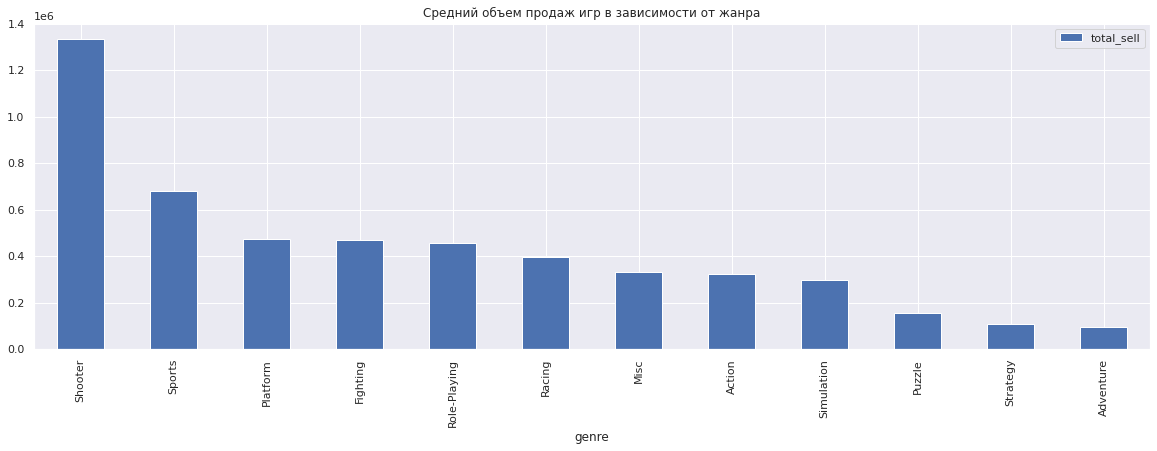

In [77]:
data_relevant.pivot_table(index='genre', 
                          values='total_sell').sort_values(by='total_sell', ascending=False)\
.plot.bar(grid=True, title='Средний объем продаж игр в зависимости от жанра');

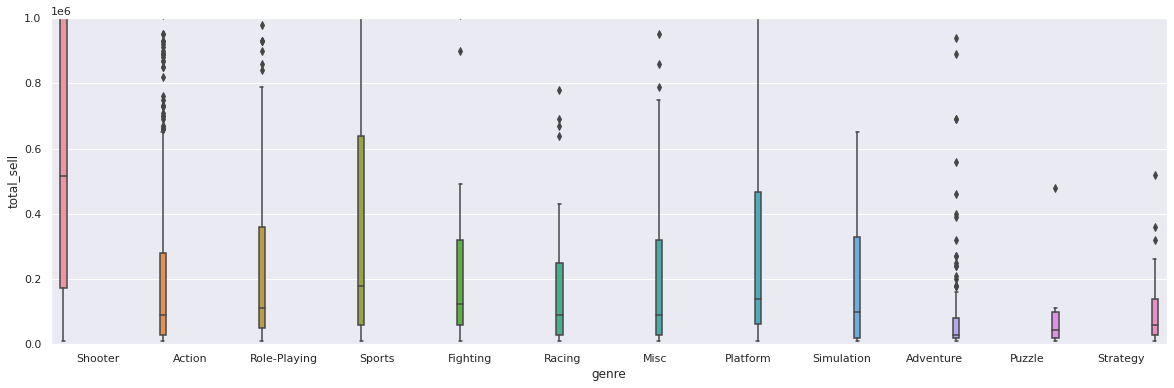

In [78]:
sns.boxplot(data=data_relevant,x='genre',y='total_sell', hue='genre');
sns.set(rc={'figure.figsize':(24,10)})
plt.ylim(0, 1000000)
plt.legend([],[], frameon=False);


Из графиков мы видим, что наиболее успешным жанром является `Shooter`, идущий с большим отрывом от остальных жанров. Также относительно неплохие показатели у жанра `Sports`. Также можно выделить трех явных аутсайдеров - это жанры `Puzzle`, `Strategy` и `Adventure`. Остальные жанры можно назвать середняками.

Рассмотрим прибыльные жанры более подробно.

In [79]:
top_genres = ['Shooter', 'Sports']

In [80]:
data_relevant.query('genre == @top_genres')['platform'].value_counts()

PS4     80
XOne    70
PS3     47
X360    37
PC      32
PSV     11
3DS      5
WiiU     5
Wii      1
PSP      1
Name: platform, dtype: int64

Наиболее популярные жанры чаще всего выпускаются на PS4 и Xone, что логично, так как это самые популярные платформы. К тому же есть несколько серий популярных шутеров и спортивных симуляторов (футбол, хоккей, баскетбол и т.д.), специализирующихся как раз на играх для игровых приставок.

In [81]:
data_relevant.query('genre == @top_genres and user_score >=0').pivot_table(index='genre', 
                                                                           aggfunc={'critic_score':'mean', 
                                                                                    'user_score':'mean', }).round(1)

,critic_score,user_score
genre,,
Shooter,75.7,6.5
Sports,70.5,5.2


Оценки критиков для популярных жанров на достаточно высоком уровне, так как среди шутеров и спортивных симуляторов достаточно много высокобюджетных проектов, в которых реализуются передовое технологии разработки игр. В то же время оценки пользователей несколько ниже, это может быть связано с тем, что крупные релизы вызывают большой ажиотаж и соответственно высокий уровень ожиданий, которому не всегда удается соответствовать.

In [82]:
data_relevant.query('genre == @top_genres')['rating'].value_counts()

E          97
M          76
unknown    46
T          44
E10+       26
Name: rating, dtype: int64

В популярных жанрах лидируют игры с рейтингом `E` и `M`, что вполне ожидаемо, так как шутеры подразумевают насилие на экране.

[К общим итогам](#results) 

<a id="step_4"></a>
# Портрет пользователя каждого региона

## доля топ-5 платформ.

In [83]:
def counting(region, parameter):
    return (data_relevant.groupby(parameter)[region].sum()/data_relevant[region].sum()).round(2).sort_values(ascending=False)[:5]

Для региона na_sales доля топ-5 платформ составляет:


platform
PS4     0.35
XOne    0.29
X360    0.10
3DS     0.08
PS3     0.08
Name: na_sales, dtype: float64

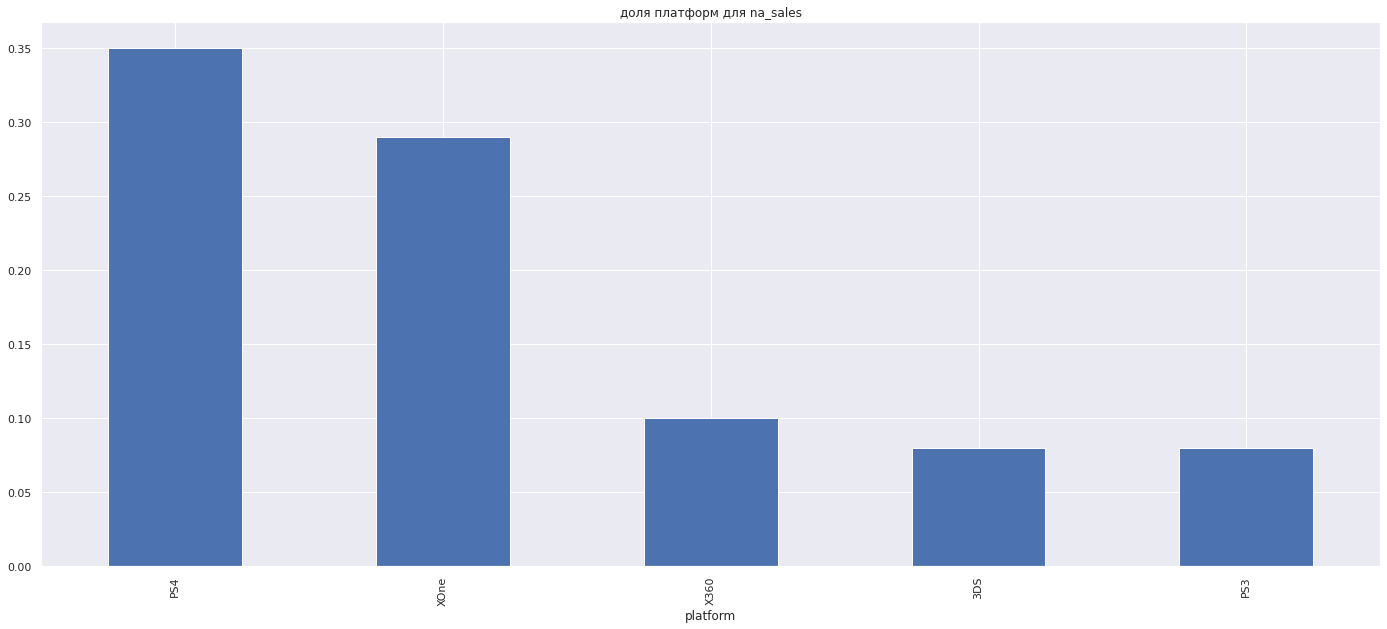

Для региона eu_sales доля топ-5 платформ составляет:


platform
PS4     0.48
XOne    0.17
PS3     0.09
PC      0.07
3DS     0.06
Name: eu_sales, dtype: float64

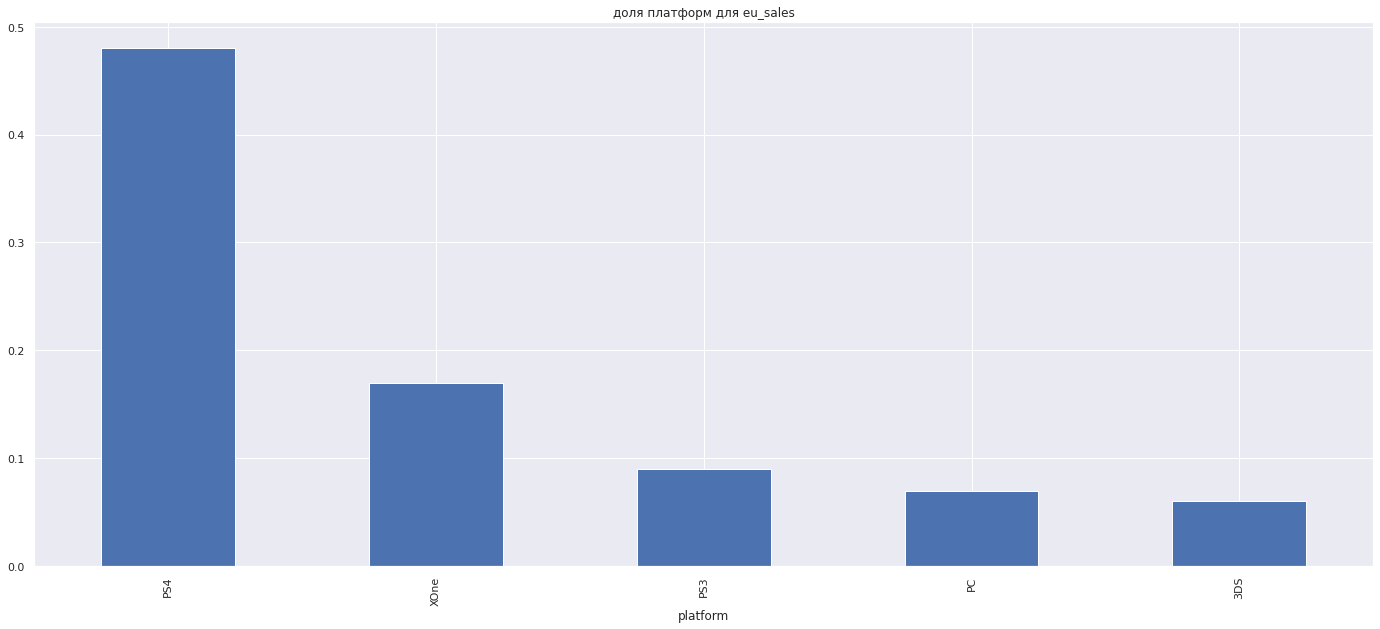

Для региона jp_sales доля топ-5 платформ составляет:


platform
3DS     0.48
PS4     0.16
PSV     0.16
PS3     0.12
WiiU    0.08
Name: jp_sales, dtype: float64

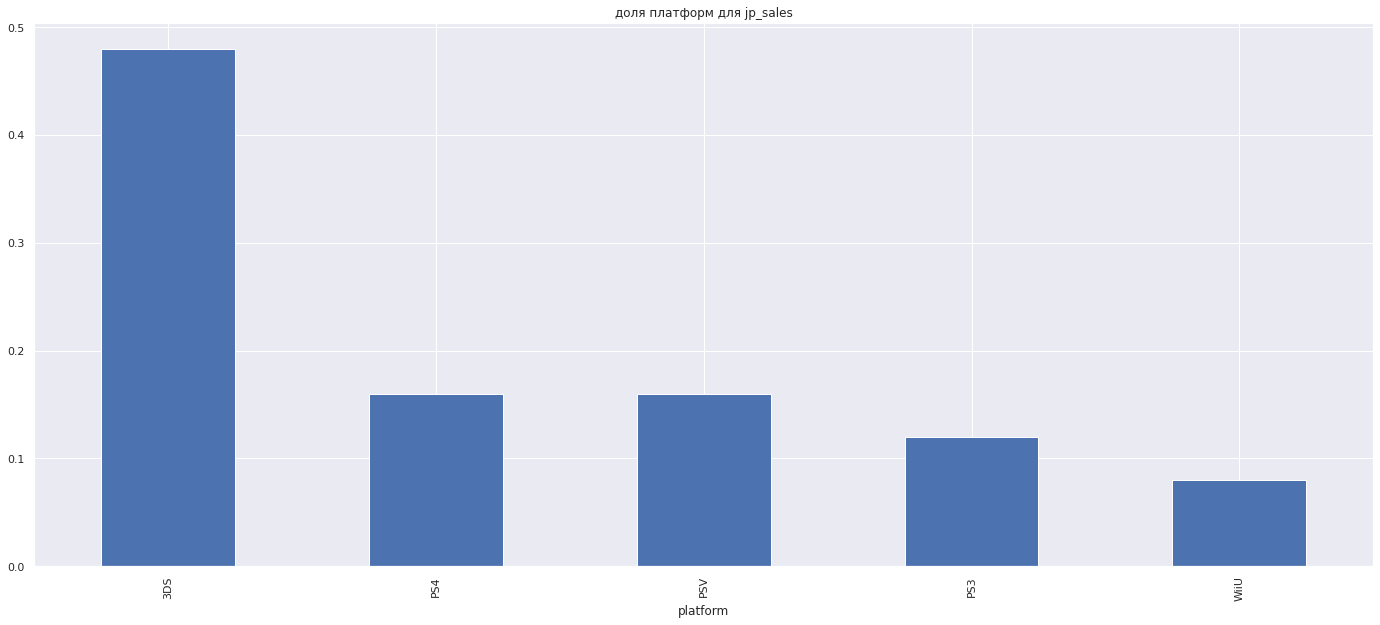

In [84]:
for reg in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f'Для региона {reg} доля топ-5 платформ составляет:')
    display(counting(reg, 'platform'))
    counting(reg, 'platform').plot.bar(title=f'доля платформ для {reg}')
    plt.show()

В Северной Америке и в Европе самая популярная платформа - PS4 (35% и 48% соответственно), причем в Европе первое место имеет значительный отрыв от второго (31%) PS4 там безоговорчный фаворит. Японии самая популярная платформа - 3DS (48%) также с большим отрывом от второго места (32%). Второе место в Северной Америке и Европе также совпадают - это Xone(29% в СА, 17% в Европе), в Японии второе место делят PS4 и PSV (по 16%). В СА дальше идут X360, 3DS и PS3 (10% у X360 и по 8% у 3DS и PS3). В Европе тройку замыкает PS3 (9%), а далее идут PC и 3DS(7% и 6%). В Японии замыкают пятерку PS3 и WiiU(12% и 8%).

Основные характеристики регионов в разрезе платформ следующие:

**Северная Америка** - конкуренция двух доминирующих приставок PS4 и Xbox (два поколения - 360 и One). Вместе они занимают три четверти рынка.

**Европа** - подавляющее преимущество PS4 - практически половина рынка. Если учесть PS3, то семейство Sony однозначный лидер в регионе (практически 60% рынка).

**Япония** - единственный регион, где лидер - портативная игровая приставка, третье место со значительной долей рынка также занимает портативная приставка. Вместе они занимают 65% рынка. Это говорит об иной культуре геймерства нежели в СА и Европе.

## доля топ-5 жанров.

In [85]:
for reg in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f'Для региона {reg} доля топ-5 жанров составляет:')
    display(counting(reg, 'genre'))

Для региона na_sales доля топ-5 жанров составляет:


genre
Shooter         0.28
Action          0.26
Sports          0.16
Role-Playing    0.12
Misc            0.05
Name: na_sales, dtype: float64

Для региона eu_sales доля топ-5 жанров составляет:


genre
Action          0.28
Shooter         0.24
Sports          0.17
Role-Playing    0.10
Misc            0.05
Name: eu_sales, dtype: float64

Для региона jp_sales доля топ-5 жанров составляет:


genre
Role-Playing    0.33
Action          0.32
Fighting        0.07
Misc            0.06
Shooter         0.05
Name: jp_sales, dtype: float64

Распределение игр в СА и в Европе практически одинаковое, единственная разница, что в СА на первом месте с минимальным отрывом жанр `Shooter` (28%), а на втором жанр `Action` (26%), а в Европе наоборот (`Action` - 28%, `Shooter` - 24%). В Японии ситуация выглядит иначе: Первое место по сути делят два жанра: `Role-Playing` и `Action` (33% и 32%), затем с огромным отрывом идет жанр `Fighting` (7%), вообще не попавший в топ-5 в СА и Европе. Жанр `Shooter`, так популярный в СА и Европе, в Японии занимает лишь пятое место с 5% рынка. Также в топ-5 во всех регионах с 5-процентным результатом попал жанр `Misc` - это игры, не попадающие ни в один из общепринятых жанров.

## Влияние рейтинга ESRB на продажи.

<AxesSubplot:ylabel='jp_sales'>

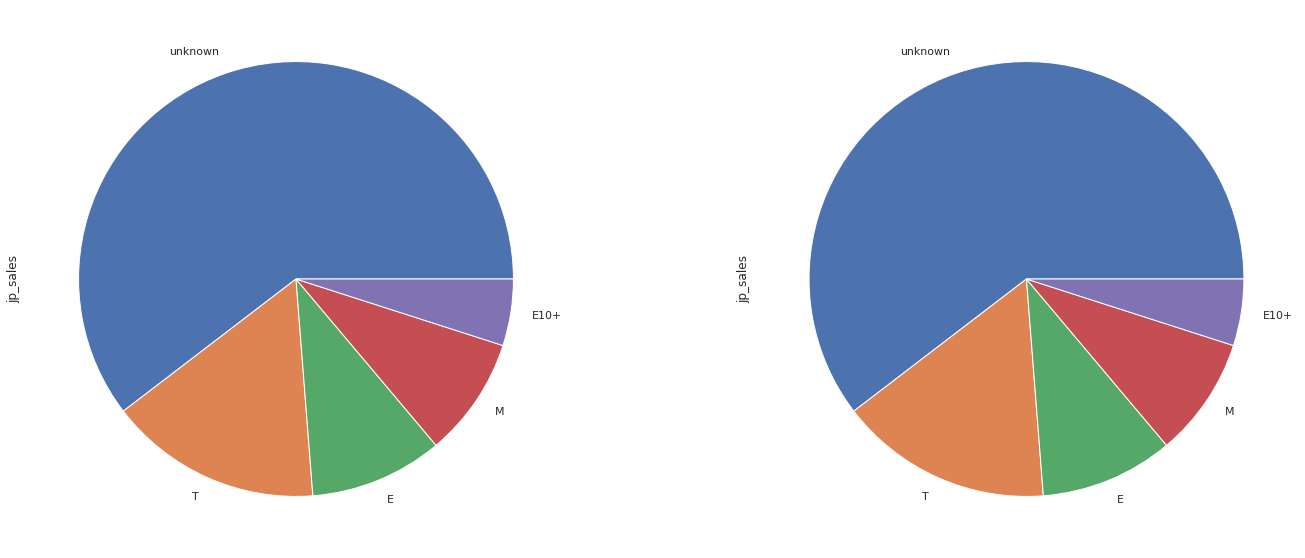

In [86]:
plt.subplot(1,2,1)
counting(reg, 'rating').plot.pie()
plt.subplot(1,2,2)
counting(reg, 'rating').plot.pie()


Для региона na_sales доля каждого возрастного рейтинга составляет:


rating
M          0.34
unknown    0.23
E          0.18
T          0.14
E10+       0.12
Name: na_sales, dtype: float64

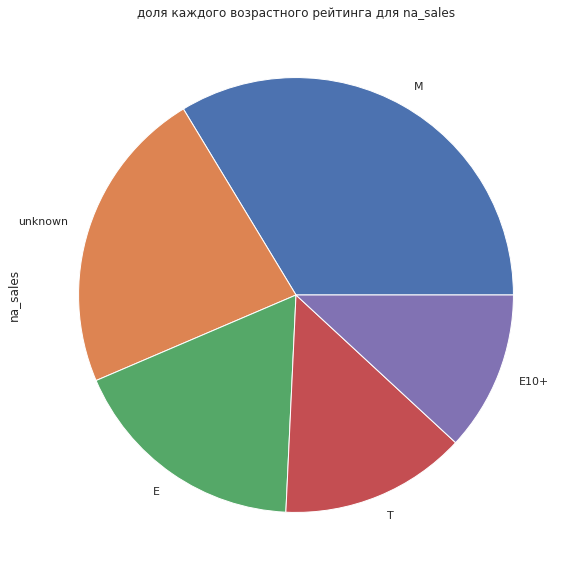

Для региона eu_sales доля каждого возрастного рейтинга составляет:


rating
M          0.35
unknown    0.22
E          0.21
T          0.13
E10+       0.10
Name: eu_sales, dtype: float64

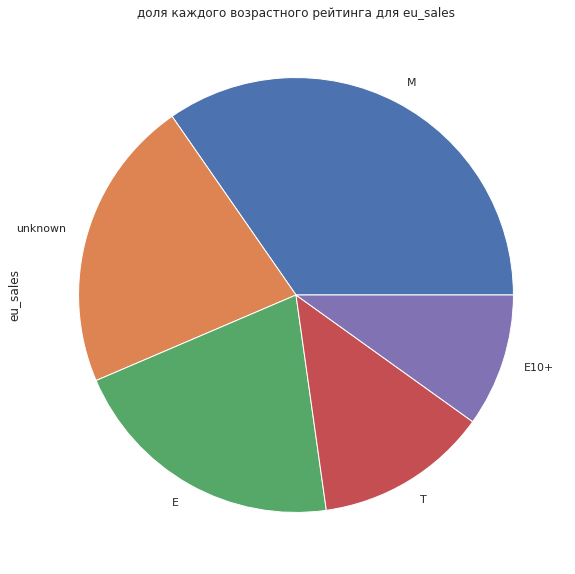

Для региона jp_sales доля каждого возрастного рейтинга составляет:


rating
unknown    0.61
T          0.16
E          0.10
M          0.09
E10+       0.05
Name: jp_sales, dtype: float64

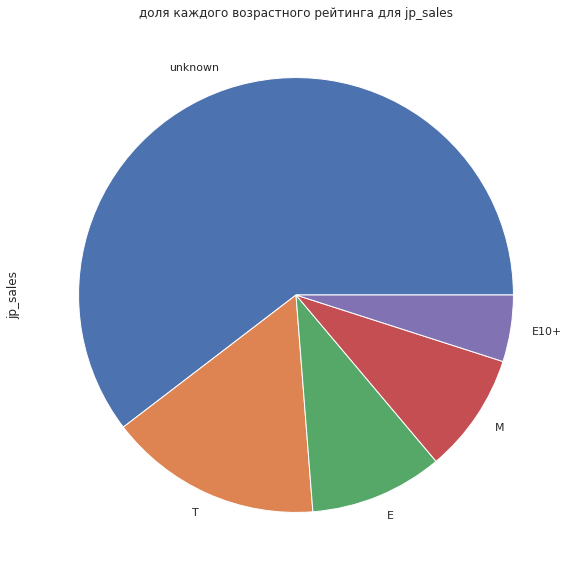

In [87]:
for reg in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f'Для региона {reg} доля каждого возрастного рейтинга составляет:')
    display(counting(reg, 'rating'))
    counting(reg, 'rating').plot.pie(title=f'доля каждого возрастного рейтинга для {reg}')
    plt.show()


Можно заметить, что распределение рейтингов, приобретенных игр в СА и Европе схоже: на первом месте с долей в примерно 35% расположены игры с рейтингом `M`, далее идут игры, для которых рейтинг не определен (чуть меньше четверти от общего объема), затем последовательно идут рейтинги `E`, `T` и `E10+`.
В Японии ситуация совершенно иная: на первом месте с огромным отрывом идут игры, для которых возрастной рейтинг не определен (60% рынка), вероятно это связано с тем, что в Японии много локальных игр, которые не попали в поле зрения ESRB, также среди игр с рейтингом на первом месте идут игры с рейтингом `T`, а не `M`, как в СА и Европе. По итогу можно сказать, что  Японский рынок очень сильно отличается от рынков СА и Европы.

## Общий портрет.

- **Северная Америка** - типичный пользователь в СА - играет в основном в игры с рейтингом `M` и `E`, предпочитает классические игровые приставки семейства Sony или Xbox, играющий в игры жанра `Shooter` и `Action`, реже в спортивные игры (жанр `Sport`).
- **Европа** - типичный пользователь в Европе также предпочитает классические приставки, но с большей вероятностью предпочитает приставки семейства Sony, в основном играет в игры жанра `Shooter` и `Action`, реже `Sports`. Также как и в СА в основном выбирает игры с рейтингом `M` и `E`.
- **Япония** - типичный японский пользователь в основном играет на портативных игровых приставках. В основном играет в `Role-Play` и `Action` игры, также вероятно предпочитает локальные игры, для которых отсутствует международный возрастной рейтинг.

[К общим итогам](#results) 

<a id="step_5"></a>
# Проверка гипотез.

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

1. Постановка вопроса требует от нас ответа равны ли средние пользовательские рейтинги или нет, следовательно наша гипотеза должна быть ***двусторонней***.
2. Мы сравниваем статистики двух генеральных совокупностей, а именно среднее значение пользовательских рейтингов. Также мы считаем, что наши выборки соответствуют следующим услвоиям:
    - они не зависят друг от друга.
    - они достаточно многочислены, чтобы считать, что выборочные средние нормально распределены.
    - их дисперсии равны, так как количество значений в выборках достаточно велико и примерно равно между собой.

Исходя из вышесказанного, подходящим методом проверки будет `scipy.stats.ttest_ind`, где параметры `alternative` и `equal_var`остаются по умолчанию (two-sided) и (True). А нулевая гипотеза будет звучать так:


***Средний рейтинг пользователей для платформы XOne равен среднему рейтенгу пользователей для платформы PC.***


Альтернативная гипотеза:


***Средний рейтинг пользователей для платформы XOne не равен среднему рейтингу пользователей для платформы PC.***


In [88]:
alpha = 0.05

results = st.ttest_ind(data_relevant.query('platform == "XOne" and user_score >=0')['user_score'], 
                       data_relevant.query('platform == "PC" and user_score >=0')['user_score'])

print('p-value равно:', results.pvalue)

if results.pvalue > alpha:
    print('Нет оснований отвергнуть нулевую гипотезу')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')

p-value равно: 0.10450507919348415
Нет оснований отвергнуть нулевую гипотезу


Результаты статистического теста говорят, что у нас **нет оснований отвергнуть нашу гипотезу** о том, что Средний рейтинг пользователей для платформы XOne равен среднему рейтенгу пользователей для платформы PC.

Дополнительно можно посмотреть на средние значения наших выборок, чтобы удостовериться в правдоподбности результатов тестирования.

In [89]:
data_relevant.query('platform == "XOne" and user_score >=0')['user_score'].mean()

6.594545454545456

In [90]:
data_relevant.query('platform == "PC" and user_score >=0')['user_score'].mean()

6.298360655737705

Значения действительно имеют небольшой разброс, что говорит в пользу результатов t-теста.

## Средние пользовательские рейтинги жанров Action  и Sports  разные.

1. Постановка вопроса требует от нас ответа равны ли средние пользовательские рейтинги или нет, следовательно наша гипотеза должна быть ***двусторонней***.
2. Мы сравниваем статистики двух генеральных совокупностей, а именно среднее значение пользовательских рейтингов. Также мы считаем, что наши выборки соответствуют следующим услвоиям:
    - они не зависят друг от друга.
    - они достаточно многочислены, чтобы считать, что выборочные средние нормально распределены.
    - их дисперсии равны, так как количество значений в выборках достаточно велико и примерно равно между собой.

Исходя из вышесказанного, подходящим методом проверки будет `scipy.stats.ttest_ind`, где параметры `alternative` и `equal_var`остаются по умолчанию (two-sided) и (True). 

Несмотря на формулировку вопроса нулевая гипотеза будет звучать так:

***Средний пользовательский рейтинг жанра `Action` равен среднему пользовательскому рейтингу жанра `Sports`.***

Альтернативная гипотеза:

***Средний пользовательский рейтинг жанра `Action` не равен среднему пользовательскому рейтингу жанра `Sports`.***

In [91]:
alpha = 0.05

results = st.ttest_ind(data_relevant.query('genre == "Action" and user_score >=0')['user_score'], 
                       data_relevant.query('genre == "Sports" and user_score >=0')['user_score'])

print('p-value равно:', results.pvalue)

if results.pvalue > alpha:
    print('Нет оснований отвергнуть нулевую гипотезу')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')

p-value равно: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Результаты статистического теста говорят, что мы отвергаем нашу нулевую гипотезу о том, что средний пользовательский рейтинг жанра `Action` равен среднему пользовательскому рейтингу жанра `Sports`. Следовательно у нас есть основания, ответить на поставленный вопрос утвердительно.

In [92]:
data_relevant.query('genre == "Action" and user_score >=0')['user_score'].mean()

6.760606060606061

In [93]:
data_relevant.query('genre == "Sports" and user_score >=0')['user_score'].mean()

5.2251968503937

Мы видим, что средние значения двух выборок имеют большой разброс, что согласовывается с результатами t-теста.

<a id="results"></a>
# Общий вывод.

В рамках настоящего исследования мы работали с данными о работе интернет-магазина "Стримчик" до 2016 года. В нашем распоряжение датафрейм, содержащий следующие данные:
- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Информация о данных в столбце `Rating`:

- `EC` - Для детей младшего возраста.
- `E` - Подходит для всех возрастных категорий. 
- `E10+` - Подходит для лиц старше 10 лет. То же самое, что и K-A.
- `T` - Подходит для лиц старше 13 лет. 
- `M` - Подходит для лиц старше 17 лет. 
- `AO` - Подходит для взрослых старше 18 лет.
- `RP` - Категория ещё не присвоена. 

Также важно отметить, что год выпуска игры не означает, что количество проданных копий этой игры, указанных в графах с продажами в различных регионах, было достигнуто в тот же год. То есть, если для какой-либо игры `year_of_release` указан 2000, а количество проданных копий в Европе - 100 000, это не значит, что все 100 000 копий были проданы в 2000 году. Однако учитывая специфику современной игровой индустрии, в которой новые игры появляются практически каждый день, и тот факт, что основная работа планируется с актуальными данными за последние несколько лет, мы можем считать, что основной объем приобретений игры происходит в год ее выпуска, а затем она "забывается".

В ходе проведения исследования нами были предприняты следующие действия:

[**1. Загрузка и первичный анализ данных.**](#step_1)
 
По итогам предварительной оценки данных, находящихся в датафрейме, мы получили следующие результаты:
В датафрейме **16715** строк и **11 столбцов**. 

Названия столбцов необходимо привести в соответствие со стандартами записи переменных, изменив регистр всех букв на нижний.

Информация по столбцам датафрейма:

- `Name` — хранит 16713 непустых значений с типом данных `object`. Предварительно можно сказать, что в данном столбце присутствуют два пропуска. Тип данных признаем подходящим для хранимой информации.
- `Platform` —  хранит 16715 непустых значений с типом данных `object`. Пропуски отсутствуют. Тип данных признаем подходящим для хранимой информации.
- `Year_of_Release` — хранит 16446 непустых значений с типом данных `float64`. Предварительно можно сказать, что в данном столбце присутствуют 269 пропусков. Тип данных необходимо изменить на `int`, так как год выпуска не может иметь значения после запятой.
- `Genre` — хранит 16713 непустых значений с типом данных `object`. Предварительно можно сказать, что в данном столбце присутствуют два пропуска. Тип данных признаем подходящим для хранимой информации.
- `NA_sales` — хранит 16715 непустых значений с типом данных `float64`. Пропуски отсутствуют. Тип данных необходимо изменить на `int`.
- `EU_sales` — хранит 16715 непустых значений с типом данных `float64`. Пропуски отсутствуют. Тип данных необходимо изменить на `int`.
- `JP_sales` — хранит 16715 непустых значений с типом данных `float64`. Пропуски отсутствуют. Тип данных необходимо изменить на `int`.
- `Other_sales` — хранит 16715 непустых значений с типом данных `float64`. Пропуски отсутствуют. Тип данных необходимо изменить на `int`.
- `Critic_Score` — хранит 8137 непустых значений с типом данных `float64`. Предварительно можно сказать, что в данном столбце присутствуют 8578 пропусков. Тип данных признаем подходящим.
- `User_Score` — хранит 10014 непустых значений с типом данных `object`. Предварительно можно сказать, что в данном столбце присутствуют 6701 пропуск. Тип данных необходимо изменить на `float`.
- `Rating` — хранит 9949 непустых значений с типом данных `object`. Предварительно можно сказать, что в данном столбце присутствуют 6766 пропусков. Тип данных признаем подходящим для хранимой информации.

[**2. Предобработка данных.**](#step_2)

- Мы переименовали название столбцов, избавившись от заглавных букв.
- Изменили типы данных ряда столбцов:
    - для столбца `year_of_release` тип данных изменен с `float` на `int`, также на этом этапе удалили строки с пропуском в данном столбце.
    - для столбцов `na_sales`,`eu_sales`,`jp_sales`, `other_sales` значения, данные в миллионах штук, переведены в штуки, а тип данных изменен с `float` на `int`.
    - для столбца `user_score` сначала отдельно рассмотрено значение `tbd`. Мы установили, что это обозначение используется, когда оценка для игры еще не сформирована. Так как для нас это равнозначно отсутствию оценки, то значение tbd, а также пропуски заменены на отрицательное значение, чтобы четко отделить их от имеющихся оценок. Затем тип данных был изменен с `object` на `float`.
- Обработали пропуски:
    - удалены две строки, у которых отсутствовали значения одновременно в столбцах `name` и `genre`.
    - установлено, что зачастую для какой-либо игры отсутствует информация одновременно по пользовательским оценкам, оценкам критиков и возрастному рейтингу, и что это не связано с тем, что для старых игр оценки и рейтинг могли не формироваться. Стоит изучить процесс сбора данных по оценкам и возрастному рейтингу с целью его совершенствования. Также установлено, что отсутствующий рейтинг нельзя заменить данными для той же игры на другой платформе, так как для одной и той же игры на разных платформах может быть установлен разный возрастной рейтинг. Удалена одна строка с рейтингом `RP`. Для того, чтобы при дальнейшем анализе не потерять строки без информации о рейтинге, заменили пустые значения значением `unknown`.
    - заменить пропуски в оценках критиков и пользователей на основе их оценок для той же игры на других платформах также не представляется возможным, так как практика показывает, что высокие оценки на одной платформе не означают высоких оценок на другой платформе.
- Обработали дубликаты:
    - явные дубликаты отсутствовали, но при поиске дубликатов по ключевым столбцам `name`, `platform`, `year_of_release` обнаружен один дубликат. Сведения о продажах из дубликата добавлены в основную строку, а сам дубликат удален.
    - рейтинг К-А заменен на Е10+, так как было установлено, что это одна и та же возрастная категория.
- Расчитали суммарные продажи для каждой игры и добавили соответствующие данные в новый столбец датафрейма.

[**3. Исследовательский анализ данных.**](#step_3)

- На данном этапе мы рассмотрели, сколлько игр было выпущено в каждый год.

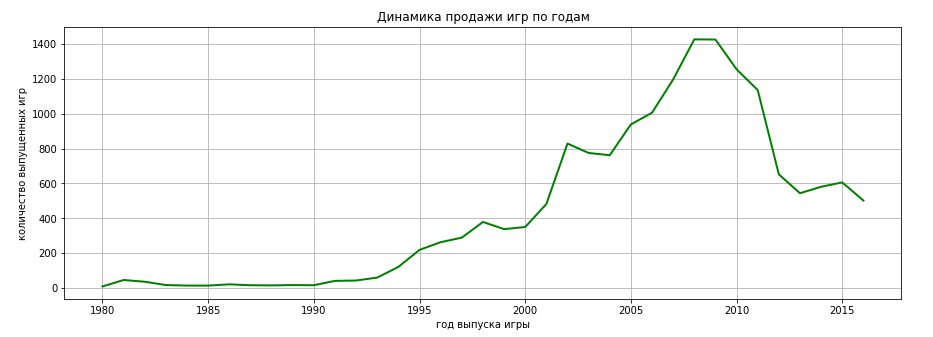

Выяснили, что **количество игр, выпущенных до 1993 года незначительно**, их можно признать выбросами.

- Определили 6 наиболее популярных платформ: **`PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`**.

Изучили динамику продаж для данных платформ.

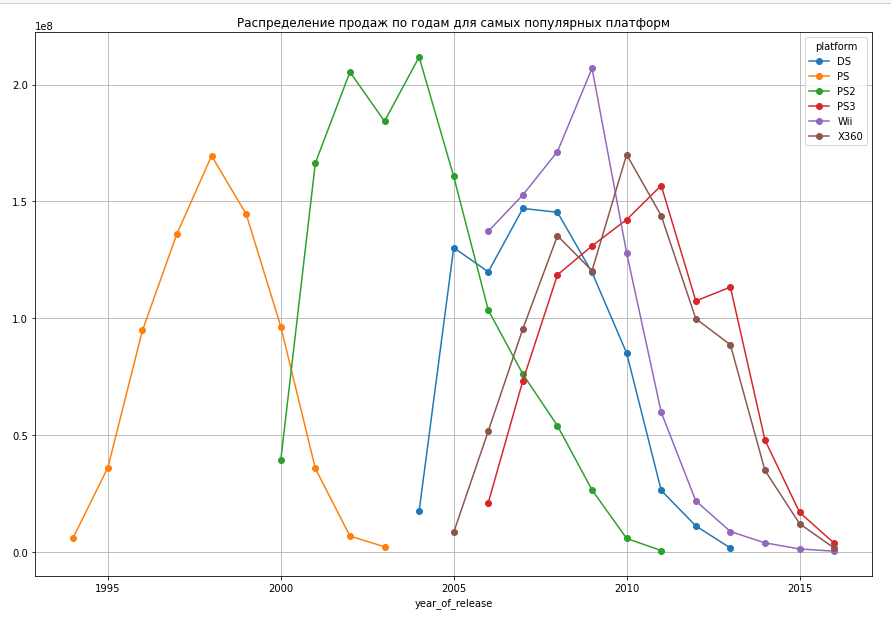

Было установлено, что **срок жизни даже самых популярных платформ составляет 10-12 лет**, из которых в среднем первые 4-6 лет - это рост продаж, а затем наступает снижение вплоть до полного прекращения продаж игр. Причем как видно из графиков, к 2016 году наступил закат для большинства основных платформ, а для PS, PS2 и DS это случилось даже раньше.

Исходя из результатов предыдущего этапа исследования, сделали вывод, что с 2010 год начался тренд на падение продаж для всех основных платформ. **Актуальным периодом можно считать период с 2014 по 2016 год**, так как в предыдущие годы есть данные по продажам тех платформ, которые к 2016 году уже "умерли", следовательно изучать информацию о них бессмысленно.

Дальнейшая работа проводилась только с данными **за актуальный период**.

- Рассмотрели продажи по платформам с целью обнаркжения потенциально прибыльных.

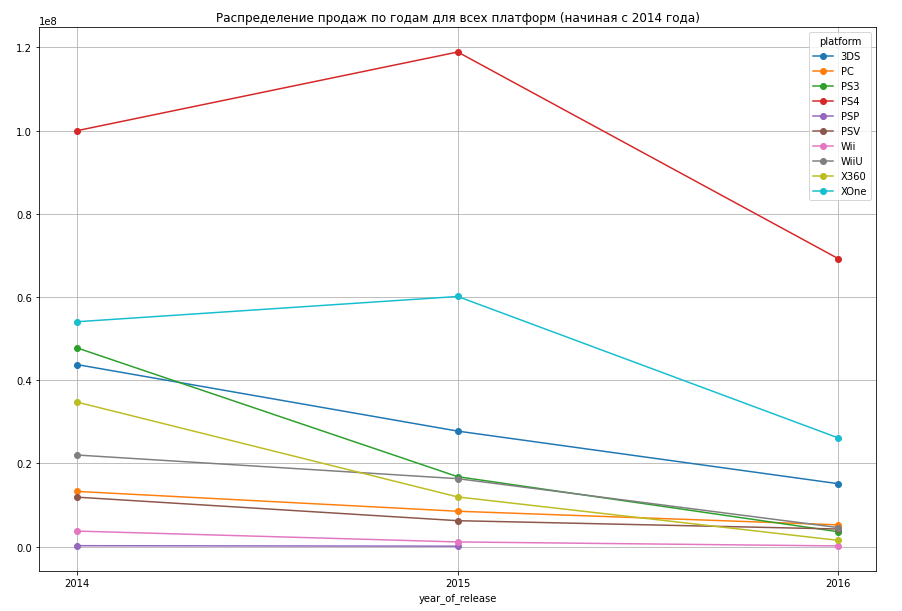

Графики показывают, что ни одна платформа не обещает роста в следующем году. Однако для всех платформ, кроме PS4 и XOne, это тренд, длящийся как минимум с 2014 года, в то время как для PS4 и XOne - это первый год, когда произошло снижение продаж. Также платформа 3DS имеет достойные результаты относительно большинства платформ. Поэтому признаем PS4, XOne и 3DS потенциально прибыльными платформами.

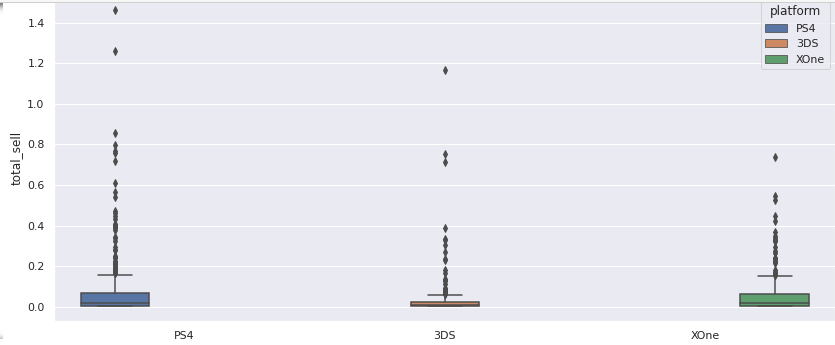

- Оценили глобальные продажи игр в разбивке по платформам:

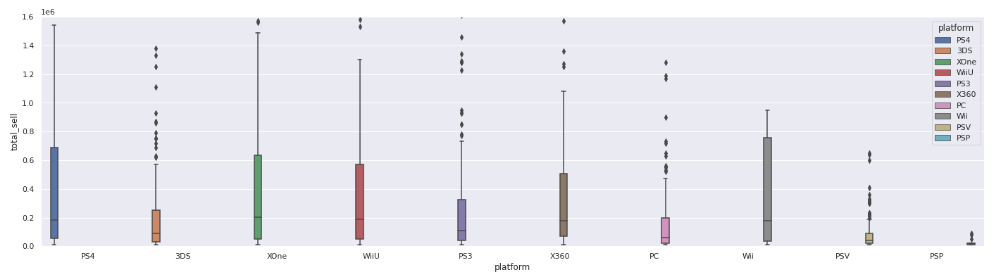

На графиках распределения мы видим, что медианные значения крупных платформ (PS4, Xone, WiiU, X360, Wii) колеблятся в районе 200 000 проданных игр, а у более маленьких платформ медиана находится в районе 100 000 проданных игр или менее. Ни для одной платформы нормальные значения не превышают полутора миллионов проданных игр. Также видно, что у всех платформ медиана тяготеет к нижней границе ящика, а нижний "ус" упирается в ноль, это говорит о том, что основная масса игр разошлись маленьким тиражом, но есть игры бестселлеры, которые создают выбросы на несколько миллионов проданных копий, и даже на практически 15 000 000 копий.

- Оценили влияние отзывов критиков и пользователей на продажи.

Для оценки влияния отзывов критиков и пользователей на продажи мы рассмотрели самую популярную платформу PS4.

Получена следующая матрица корреляций:

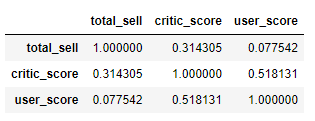

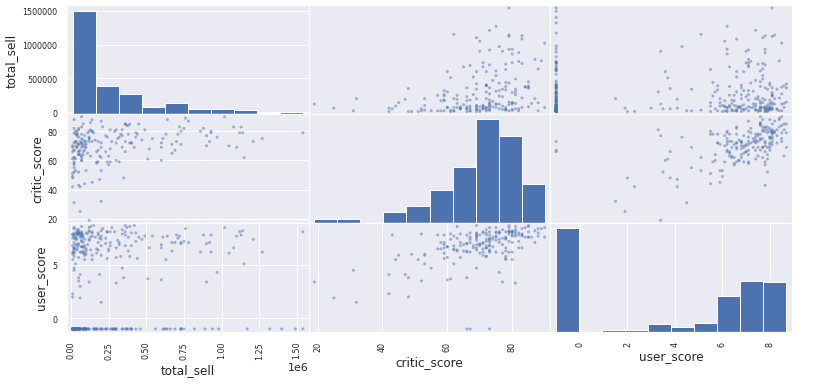

Расчет корреляции и графики говорят о том, что между оценкой игроков и количеством проданных игр корреляция практически отсутствует, а между количеством проданных игр и оценкой критиков есть слабая прямая корреляция. Что в целом близко к реальности, оценка игры от игроков формируется в основном уже после стартового ажиатожа, в ходе которого и покупается основная часть копий игры. То есть стартовый и самый значимый спрос формируют другие факторы, одним из которых (но далеко не решающим) является отзывы критиков.

Посмотрев корреляцию у других платформ, мы заметили, что для разных платформ корреляция может достаточно сильно отличаться, что может быть связано с общим количеством отзывов, имеющихся в наличии. Но в целом общая картина такова: отзывы критиков и игроков либо практически не коллериуют со спросом на игру, либо коррелируют слабо, и лишь изредко корреляцию можно признать умеренной. Также отметим, что для платформы Wii отсутствуют оценки критиков, а для платформы PSP отсутствуют как оценки критиков, так и оценки игроков.

- Проанализировали продажи в зависимости от жанра игр.

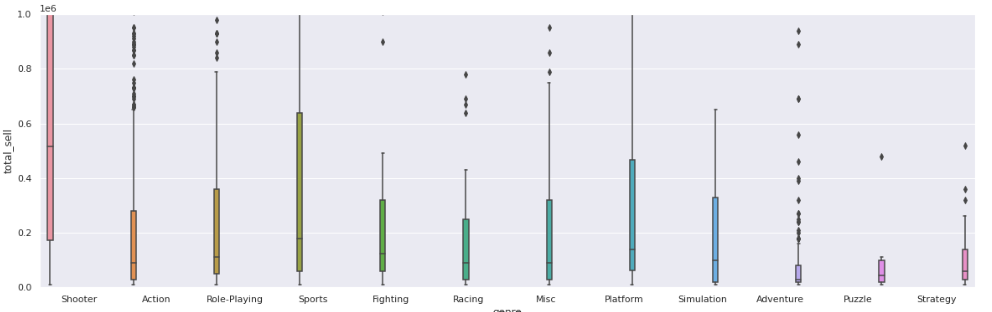

Из графика мы видим, что наиболее успешным жанром является `Shooter`, идущий с большим отрывом от остальных жанров. Также относительно неплохие показатели у жанра `Sports`. Также можно выделить трех явных аутсайдеров - это жанры `Puzzle`, `Strategy` и `Adventure`. Остальные жанры можно назвать середняками.

[**4. Портрет пользователя каждого региона.**](#step_4)

В Северной Америке и в Европе самая популярная платформа - PS4 (35% и 48% соответственно), причем в Европе первое место имеет значительный отрыв от второго (31%) PS4 там безоговорчный фаворит. Японии самая популярная платформа - 3DS (48%) также с большим отрывом от второго места (32%). Второе место в Северной Америке и Европе также совпадают - это Xone(29% в СА, 17% в Европе), в Японии второе место делят PS4 и PSV (по 16%). В СА дальше идут X360, 3DS и PS3 (10% у X360 и по 8% у 3DS и PS3). В Европе тройку замыкает PS3 (9%), а далее идут PC и 3DS(7% и 6%). В Японии замыкают пятерку PS3 и WiiU(12% и 8%).

Основные характеристики регионов в разрезе платформ следующие:

**Северная Америка** - конкуренция двух доминирующих приставок PS4 и Xbox (два поколения - 360 и One). Вместе они занимают три четверти рынка.

**Европа** - подавляющее преимущество PS4 - практически половина рынка. Если учесть PS3, то семейство Sony однозначный лидер в регионе (практически 60% рынка).

**Япония** - единственный регион, где лидер - портативная игровая приставка, третье место со значительной долей рынка также занимает портативная приставка. Вместе они занимают 65% рынка. Это говорит об иной культуре геймерства нежели в СА и Европе.

Можно заметить, что распределение рейтингов, приобретенных игр в СА и Европе схоже: на первом месте с долей в примерно 35% расположены игры с рейтингом `M`, далее идут игры, для которых рейтинг не определен (чуть меньше четверти от общего объема), затем последовательно идут рейтинги `E`, `T` и `E10+`.
В Японии ситуация совершенно иная: на первом месте с огромным отрывом идут игры, для которых возрастной рейтинг не определен (60% рынка), вероятно это связано с тем, что в Японии много локальных игр, которые не попали в поле зрения ESRB, также среди игр с рейтингом на первом месте идут игры с рейтингом `T`, а не `M`, как в СА и Европе. По итогу можно сказать, что  Японский рынок очень сильно отличается от рынков СА и Европы.

**ОБЩИЙ ПОРТРЕТ**

- **Северная Америка** - типичный пользователь в СА - играет в основном в игры с рейтингом `M` и `E`, предпочитает классические игровые приставки семейства Sony или Xbox, играющий в игры жанра `Shooter` и `Action`, реже в спортивные игры (жанр `Sport`).
- **Европа** - типичный пользователь в Европе также предпочитает классические приставки, но с большей вероятностью предпочитает приставки семейства Sony, в основном играет в игры жанра `Shooter` и `Action`, реже `Sports`. Также как и в СА в основном выбирает игры с рейтингом `M` и `E`.
- **Япония** - типичный японский пользователь в основном играет на портативных игровых приставках. В основном играет в `Role-Play` и `Action` игры, также вероятно предпочитает локальные игры, для которых отсутствует международный возрастной рейтинг.

[**5. Проверка гипотез**](#step_5)

Нами проверялось два предположения:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action  и Sports  разные.

**По первой гипотезе:**

1. Постановка вопроса требует от нас ответа равны ли средние пользовательские рейтинги или нет, следовательно наша гипотеза должна быть ***двусторонней***.
2. Мы сравниваем статистики двух генеральных совокупностей, а именно среднее значение пользовательских рейтингов. Также мы считаем, что наши выборки соответствуют следующим услвоиям:
    - они не зависят друг от друга.
    - они достаточно многочислены, чтобы считать, что выборочные средние нормально распределены.
    - их дисперсии равны, так как количество значений в выборках достаточно велико и примерно равно между собой.

Исходя из вышесказанного, подходящим методом проверки будет `scipy.stats.ttest_ind`, где параметры `alternative` и `equal_var`остаются по умолчанию (two-sided) и (True). А нулевая гипотеза будет звучать так:


***Средний рейтинг пользователей для платформы XOne равен среднему рейтенгу пользователей для платформы PC.***


Альтернативная гипотеза:


***Средний рейтинг пользователей для платформы XOne не равен среднему рейтингу пользователей для платформы PC.***

Результаты статистического теста говорят, что у нас **нет оснований отвергнуть нашу гипотезу** о том, что Средний рейтинг пользователей для платформы XOne равен среднему рейтенгу пользователей для платформы PC.

**По второй гипотезе:**

1. Постановка вопроса требует от нас ответа равны ли средние пользовательские рейтинги или нет, следовательно наша гипотеза должна быть ***двусторонней***.
2. Мы сравниваем статистики двух генеральных совокупностей, а именно среднее значение пользовательских рейтингов. Также мы считаем, что наши выборки соответствуют следующим услвоиям:
    - они не зависят друг от друга.
    - они достаточно многочислены, чтобы считать, что выборочные средние нормально распределены.
    - их дисперсии равны, так как количество значений в выборках достаточно велико и примерно равно между собой.

Исходя из вышесказанного, подходящим методом проверки будет `scipy.stats.ttest_ind`, где параметры `alternative` и `equal_var`остаются по умолчанию (two-sided) и (True). 

Несмотря на формулировку вопроса нулевая гипотеза будет звучать так:

***Средний пользовательский рейтинг жанра `Action` равен среднему пользовательскому рейтингу жанра `Sports`.***

Альтернативная гипотеза:

***Средний пользовательский рейтинг жанра `Action` не равен среднему пользовательскому рейтингу жанра `Sports`.***

Результаты статистического теста говорят, что мы отвергаем нашу нулевую гипотезу о том, что средний пользовательский рейтинг жанра `Action` равен среднему пользовательскому рейтингу жанра `Sports`. Следовательно у нас есть основания, ответить на поставленный вопрос утвердительно.